In [347]:
import pandas as pd
import matplotlib.pyplot as plt

In [348]:
def function_a_moustache(serie):
    IQR = serie.quantile(q=0.75) - serie.quantile(q=0.25)
    max_bar = serie.quantile(q=0.75) + 1.5*IQR
    min_bar = serie.quantile(q=0.25) - 1.5*IQR
    return {'min':min_bar, 'max':max_bar}

In [349]:
df = pd.read_csv('./data/athlete_events.csv')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [350]:
df2 = pd.read_csv('./data/noc_regions.csv')
df2

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [351]:
df3 = pd.merge(df, df2, on=['NOC','NOC'])

# Suppression des duplicats
df3 = df3.drop_duplicates()

df3.reset_index(inplace=True)
df3=df3.drop('index', axis=1)

df_working = df3.copy()

In [352]:
df_working.isna().sum()

ID             0
Name           0
Sex            0
Age         9303
Height     58726
Weight     61437
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229619
region        21
notes     264347
dtype: int64

In [353]:
df_working=df_working.drop(['ID','Team','Games','Season','notes', 'region', 'City'], axis=1)

In [354]:
df_working['Medal'].fillna('Aucune', inplace=True)

In [355]:
df_working

,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Basketball,Basketball Men's Basketball,Aucune
1,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Judo,Judo Men's Extra-Lightweight,Aucune
2,Abudoureheman,M,22.0,182.0,75.0,CHN,2000,Boxing,Boxing Men's Middleweight,Aucune
3,Ai Linuer,M,25.0,160.0,62.0,CHN,2004,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",Aucune
4,Ai Yanhan,F,14.0,168.0,54.0,CHN,2016,Swimming,Swimming Women's 200 metres Freestyle,Aucune
...,...,...,...,...,...,...,...,...,...,...
269377,Mamorallo Tjoka,F,23.0,150.0,56.0,LES,2008,Athletics,Athletics Women's Marathon,Aucune
269378,Mamorallo Tjoka,F,27.0,150.0,56.0,LES,2012,Athletics,Athletics Women's Marathon,Aucune
269379,M'apotlaki Ts'elho,F,15.0,NaN,NaN,LES,1996,Athletics,Athletics Women's 4 x 100 metres Relay,Aucune
269380,Lefa Tsapi,M,23.0,170.0,63.0,LES,1984,Boxing,Boxing Men's Welterweight,Aucune


In [356]:
df_working.isna().sum()

Name          0
Sex           0
Age        9303
Height    58726
Weight    61437
NOC           0
Year          0
Sport         0
Event         0
Medal         0
dtype: int64

# Weights Analysis df3

Text(0.5, 1.0, 'Répartition des poids dans notre jeu de données')

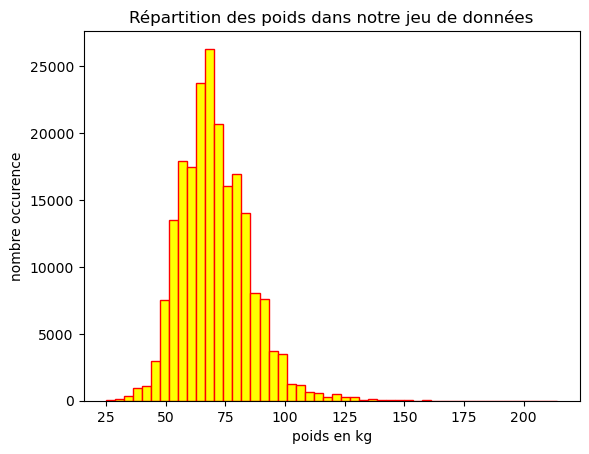

In [357]:
# Series des poids des personnes de notre base de données
weights = df_working['Weight']

plt.hist(weights, range = (weights.min(), weights.max()), bins = 50, color = 'yellow',edgecolor = 'red')
plt.xlabel('poids en kg')
plt.ylabel('nombre occurence')
plt.title('Répartition des poids dans notre jeu de données')

<AxesSubplot:>

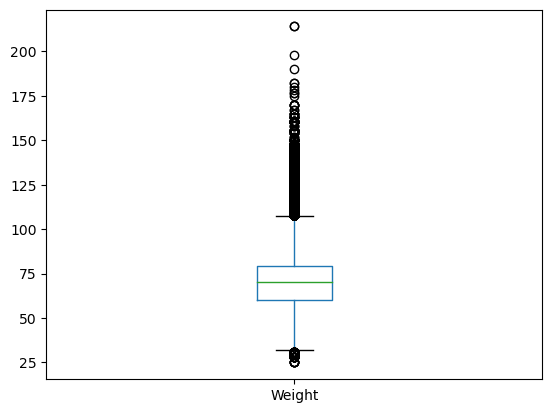

In [358]:
df_working.boxplot(column =['Weight'], grid = False)

In [359]:
function_a_moustache(df_working['Weight'])

{'min': 31.5, 'max': 107.5}

# Heights Analysis

Text(0.5, 1.0, 'Répartition des poids dans notre jeu de données')

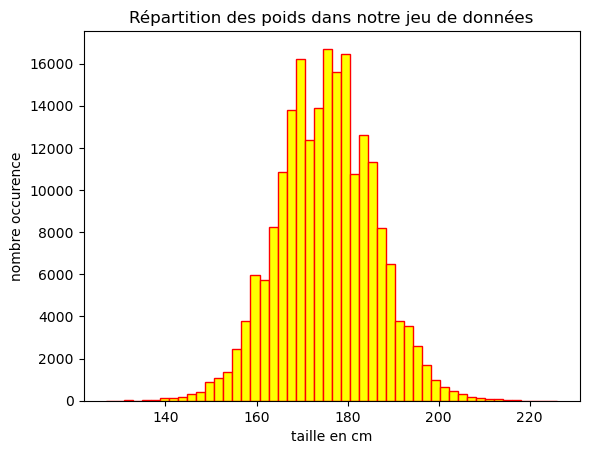

In [360]:
# Series des poids des personnes de notre base de données
heights = df_working['Height']

plt.hist(heights, range = (heights.min(), heights.max()), bins = 50, color = 'yellow',edgecolor = 'red')
plt.xlabel('taille en cm')
plt.ylabel('nombre occurence')
plt.title('Répartition des poids dans notre jeu de données')

<AxesSubplot:>

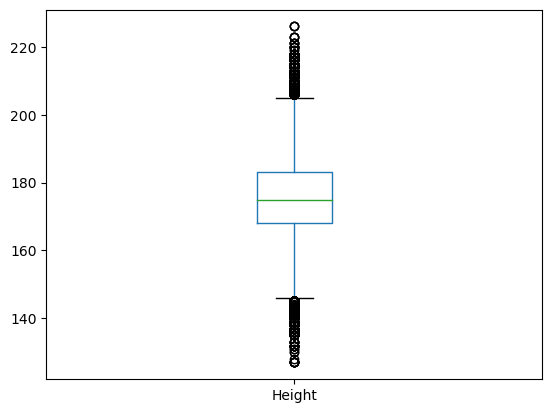

In [361]:
df_working.boxplot(column =['Height'], grid = False)

# Age Analysis

Text(0.5, 1.0, 'Répartition des poids dans notre jeu de données')

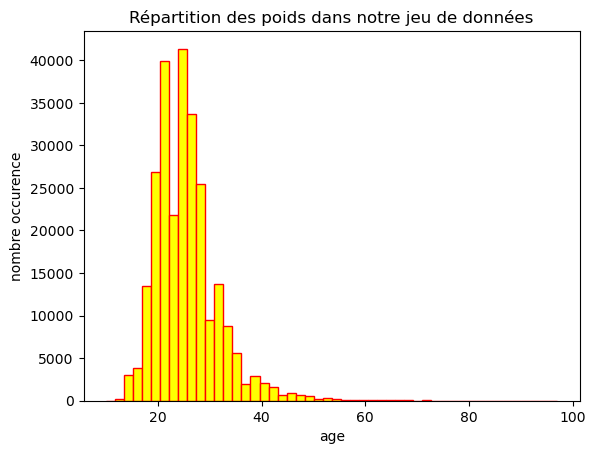

In [362]:
# Series des poids des personnes de notre base de données
ages = df_working['Age']

plt.hist(ages, range = (ages.min(), ages.max()), bins = 50, color = 'yellow',edgecolor = 'red')
plt.xlabel('age')
plt.ylabel('nombre occurence')
plt.title('Répartition des poids dans notre jeu de données')

<AxesSubplot:>

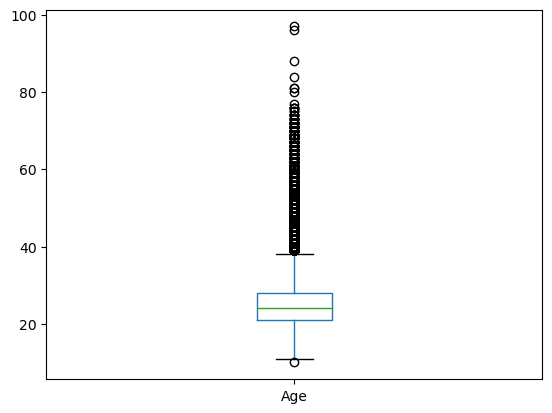

In [363]:
df_working.boxplot(column =['Age'], grid = False)

# Creation df_test pour filtrer
Objectif : filtrer (supprimer les nan et outsiders), trouver les valeurs moyennes et remplacer dans df_working

In [364]:
df_test=df_working.copy()
df_test

,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Basketball,Basketball Men's Basketball,Aucune
1,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Judo,Judo Men's Extra-Lightweight,Aucune
2,Abudoureheman,M,22.0,182.0,75.0,CHN,2000,Boxing,Boxing Men's Middleweight,Aucune
3,Ai Linuer,M,25.0,160.0,62.0,CHN,2004,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",Aucune
4,Ai Yanhan,F,14.0,168.0,54.0,CHN,2016,Swimming,Swimming Women's 200 metres Freestyle,Aucune
...,...,...,...,...,...,...,...,...,...,...
269377,Mamorallo Tjoka,F,23.0,150.0,56.0,LES,2008,Athletics,Athletics Women's Marathon,Aucune
269378,Mamorallo Tjoka,F,27.0,150.0,56.0,LES,2012,Athletics,Athletics Women's Marathon,Aucune
269379,M'apotlaki Ts'elho,F,15.0,NaN,NaN,LES,1996,Athletics,Athletics Women's 4 x 100 metres Relay,Aucune
269380,Lefa Tsapi,M,23.0,170.0,63.0,LES,1984,Boxing,Boxing Men's Welterweight,Aucune


In [365]:
df_test = df_test[df_test['Weight']<=function_a_moustache(df_test['Weight'])['max']]
df_test = df_test[df_test['Weight']>=function_a_moustache(df_test['Weight'])['min']]

df_test = df_test[df_test['Height']<=function_a_moustache(df_test['Height'])['max']]
df_test = df_test[df_test['Height']>=function_a_moustache(df_test['Height'])['min']]

df_test = df_test[df_test['Age']<=function_a_moustache(df_test['Age'])['max']]
df_test = df_test[df_test['Age']>=function_a_moustache(df_test['Age'])['min']]

df_test

,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Basketball,Basketball Men's Basketball,Aucune
1,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Judo,Judo Men's Extra-Lightweight,Aucune
2,Abudoureheman,M,22.0,182.0,75.0,CHN,2000,Boxing,Boxing Men's Middleweight,Aucune
3,Ai Linuer,M,25.0,160.0,62.0,CHN,2004,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",Aucune
4,Ai Yanhan,F,14.0,168.0,54.0,CHN,2016,Swimming,Swimming Women's 200 metres Freestyle,Aucune
...,...,...,...,...,...,...,...,...,...,...
269375,Likeleli Alinah Thamae,F,22.0,170.0,49.0,LES,2000,Taekwondo,Taekwondo Women's Flyweight,Aucune
269377,Mamorallo Tjoka,F,23.0,150.0,56.0,LES,2008,Athletics,Athletics Women's Marathon,Aucune
269378,Mamorallo Tjoka,F,27.0,150.0,56.0,LES,2012,Athletics,Athletics Women's Marathon,Aucune
269380,Lefa Tsapi,M,23.0,170.0,63.0,LES,1984,Boxing,Boxing Men's Welterweight,Aucune


# Weight after normalization

Text(0.5, 1.0, 'Répartition des poids dans notre jeu de données')

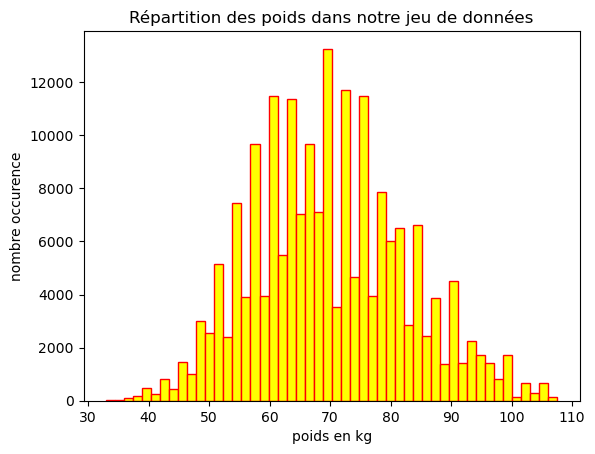

In [366]:
normweights = df_test['Weight']

plt.hist(normweights, range = (normweights.min(), normweights.max()), bins = 50, color = 'yellow',edgecolor = 'red')
plt.xlabel('poids en kg')
plt.ylabel('nombre occurence')
plt.title('Répartition des poids dans notre jeu de données')

<AxesSubplot:>

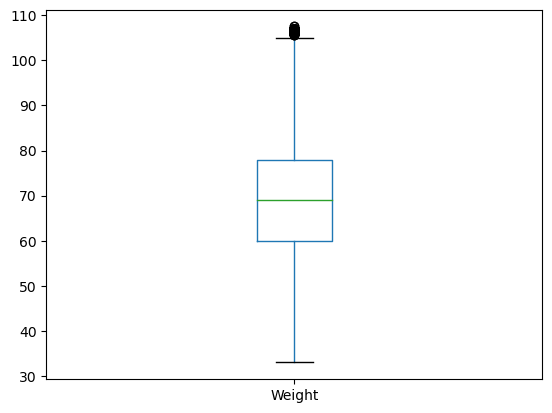

In [367]:
df_test.boxplot(column = ['Weight'], grid = False)

# Height after normalization

Text(0.5, 1.0, 'Répartition des poids dans notre jeu de données')

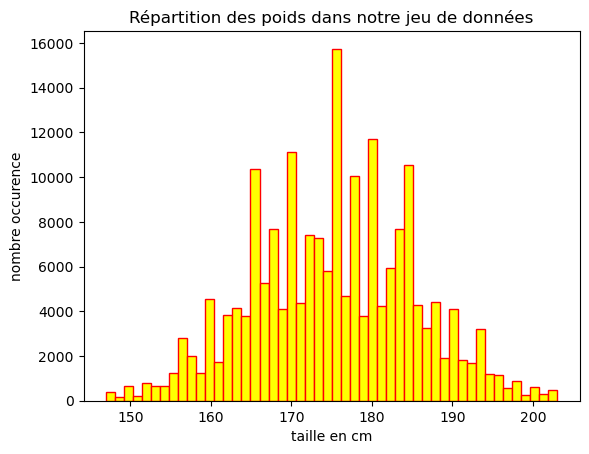

In [368]:
normheights = df_test['Height']

plt.hist(normheights, range = (normheights.min(), normheights.max()), bins = 50, color = 'yellow',edgecolor = 'red')
plt.xlabel('taille en cm')
plt.ylabel('nombre occurence')
plt.title('Répartition des poids dans notre jeu de données')

<AxesSubplot:>

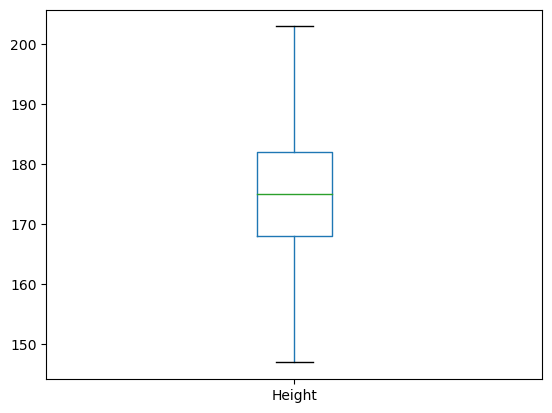

In [369]:
df_test.boxplot(column = ['Height'], grid = False)

# Age after normalization

Text(0.5, 1.0, 'Répartition des poids dans notre jeu de données')

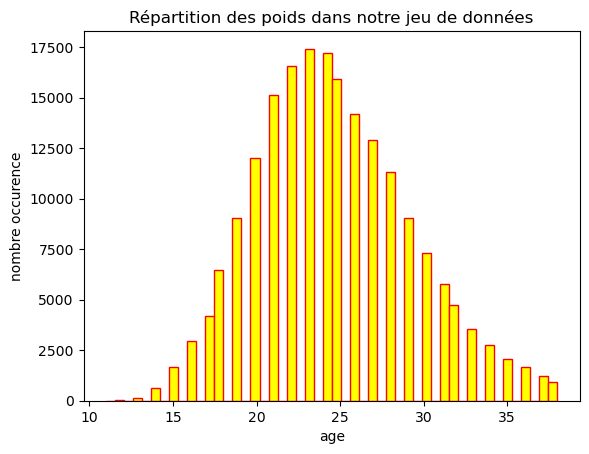

In [370]:
normages = df_test['Age']

plt.hist(normages, range = (normages.min(), normages.max()), bins = 50, color = 'yellow',edgecolor = 'red')
plt.xlabel('age')
plt.ylabel('nombre occurence')
plt.title('Répartition des poids dans notre jeu de données')

<AxesSubplot:>

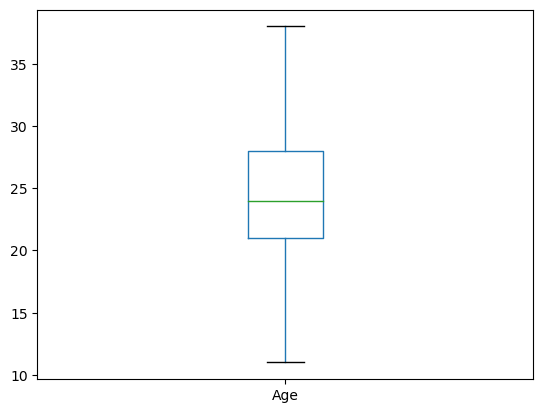

In [371]:
df_test.boxplot(column = ['Age'], grid = False)

In [372]:
# Retirer les valeurs de notre serie et en faire la moyenne
filteredWeight = normweights.dropna()

meanWeight = filteredWeight.mean()
round(meanWeight,2)

69.9

In [373]:
# Retirer les valeurs de notre serie et en faire la moyenne
filteredHeight = normheights.dropna()

meanHeight = filteredHeight.mean()
round(meanHeight,2)

175.18

In [374]:
# Retirer les valeurs de notre serie et en faire la moyenne
filteredAge = normages.dropna()

meanAge = filteredAge.mean()
round(meanAge,2)

24.63

# Remplacer dans df_working Nan avec valeurs trouvées et retirer outsiders comme ci-dessus

In [375]:
#On retire les outsiders (des deux en meme temps sinon on se retire des valeurs)

df_working['Height'].fillna(round(meanHeight,2), inplace=True)
df_working['Weight'].fillna(round(meanWeight,2), inplace=True)
df_working['Age'].fillna(round(meanAge,2), inplace=True)


df_working = df_working[df_working['Weight']<=function_a_moustache(df_working['Weight'])['max']]
df_working = df_working[df_working['Weight']>=function_a_moustache(df_working['Weight'])['min']]

df_working = df_working[df_working['Height']<=function_a_moustache(df_working['Height'])['max']]
df_working = df_working[df_working['Height']>=function_a_moustache(df_working['Height'])['min']]

df_working = df_working[df_working['Age']<=function_a_moustache(df_working['Age'])['max']]
df_working = df_working[df_working['Age']>=function_a_moustache(df_working['Age'])['min']]

df_working.reset_index(inplace=True)
df_working=df_working.drop('index', axis=1)

df_working

,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Event,Medal
0,A Dijiang,M,24.0,180.00,80.0,CHN,1992,Basketball,Basketball Men's Basketball,Aucune
1,A Lamusi,M,23.0,170.00,60.0,CHN,2012,Judo,Judo Men's Extra-Lightweight,Aucune
2,Abudoureheman,M,22.0,182.00,75.0,CHN,2000,Boxing,Boxing Men's Middleweight,Aucune
3,Ai Linuer,M,25.0,160.00,62.0,CHN,2004,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",Aucune
4,Ai Yanhan,F,14.0,168.00,54.0,CHN,2016,Swimming,Swimming Women's 200 metres Freestyle,Aucune
...,...,...,...,...,...,...,...,...,...,...
240524,Likeleli Alinah Thamae,F,22.0,170.00,49.0,LES,2000,Taekwondo,Taekwondo Women's Flyweight,Aucune
240525,Masempe Theko,F,25.0,175.18,69.9,LES,2012,Swimming,Swimming Women's 50 metres Freestyle,Aucune
240526,M'apotlaki Ts'elho,F,15.0,175.18,69.9,LES,1996,Athletics,Athletics Women's 4 x 100 metres Relay,Aucune
240527,Lefa Tsapi,M,23.0,170.00,63.0,LES,1984,Boxing,Boxing Men's Welterweight,Aucune


In [376]:
df_working.isna().sum()

Name      0
Sex       0
Age       0
Height    0
Weight    0
NOC       0
Year      0
Sport     0
Event     0
Medal     0
dtype: int64

In [377]:
df3.describe()

,ID,Age,Height,Weight,Year
count,269382.000000,260079.000000,210656.000000,207945.000000,269382.000000
mean,68245.191579,25.457542,175.344234,70.708909,1978.607123
std,39021.957943,6.162508,10.519601,14.351103,29.759095
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68208.000000,24.000000,175.000000,70.000000,1988.000000
75%,102096.000000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [378]:
df_working.describe()

,Age,Height,Weight,Year
count,240529.000000,240529.000000,240529.000000,240529.000000
mean,24.664125,174.960009,69.382519,1978.291898
std,4.548770,7.851348,9.739125,29.676632
min,12.000000,155.000000,45.000000,1896.000000
25%,21.000000,170.000000,63.000000,1960.000000
50%,24.000000,175.180000,69.900000,1988.000000
75%,27.000000,180.000000,75.000000,2002.000000
max,37.000000,195.000000,95.500000,2016.000000


# Notes

Création des champs :
- IMC = poids en kg / (taille en m)²
- Expérience (première compétition enregistrée) => min year in groupBy
- Nombre médailles => En réalité on veut prédir s'il aura une médaille, on s'en moque de combien ou desquelles.
- Champs à catégoriser => Sex, NOC, Sport

In [379]:
df_working['Name'] = df_working['Name'].str.strip()

In [380]:
df_working['IMC'] = df_working['Weight'] / ((df_working['Height']/100)*(df_working['Height']/100))

# Creation des groupBy

In [381]:
nb_competitions = df_working.groupby(['Name', 'Sex', 'NOC', 'Sport'])['Event'].count().reset_index(name='Nb_event')

nb_competitions

,Name,Sex,NOC,Sport,Nb_event
0,A Dijiang,M,CHN,Basketball,1
1,A Lamusi,M,CHN,Judo,1
2,A. Aanantha Sambu Mayavo,M,MAS,Hockey,1
3,A. Abdul Razzak,M,IRQ,Athletics,2
4,A. Albert,M,FRA,Rugby,1
...,...,...,...,...,...
124613,zge Krdar emberci,F,TUR,Volleyball,1
124614,zlem Kaya,F,TUR,Athletics,2
124615,zman Graud,M,TUR,Shooting,1
124616,zzet Safer,M,TUR,Athletics,1


In [382]:
nb_medals = df_working.groupby(['Name', 'Sex', 'NOC', 'Sport'])['Medal'].apply(lambda x: (x!='Aucune').sum()).reset_index(name='Nb_medals')

nb_medals

,Name,Sex,NOC,Sport,Nb_medals
0,A Dijiang,M,CHN,Basketball,0
1,A Lamusi,M,CHN,Judo,0
2,A. Aanantha Sambu Mayavo,M,MAS,Hockey,0
3,A. Abdul Razzak,M,IRQ,Athletics,0
4,A. Albert,M,FRA,Rugby,1
...,...,...,...,...,...
124613,zge Krdar emberci,F,TUR,Volleyball,0
124614,zlem Kaya,F,TUR,Athletics,0
124615,zman Graud,M,TUR,Shooting,0
124616,zzet Safer,M,TUR,Athletics,0


In [383]:
experience = df_working.groupby(['Name', 'Sex', 'NOC', 'Sport']).agg({'Age': ['min', 'max']})
experience.columns = experience.columns.droplevel(0)
experience['Experience'] = experience['max'] - experience['min']
experience

,,,,min,max,Experience
Name,Sex,NOC,Sport,,,
A Dijiang,M,CHN,Basketball,24.00,24.00,0.0
A Lamusi,M,CHN,Judo,23.00,23.00,0.0
A. Aanantha Sambu Mayavo,M,MAS,Hockey,26.00,26.00,0.0
A. Abdul Razzak,M,IRQ,Athletics,24.63,24.63,0.0
A. Albert,M,FRA,Rugby,24.63,24.63,0.0
...,...,...,...,...,...,...
zge Krdar emberci,F,TUR,Volleyball,27.00,27.00,0.0
zlem Kaya,F,TUR,Athletics,22.00,26.00,4.0
zman Graud,M,TUR,Shooting,33.00,33.00,0.0


In [384]:
IMC_infos = df_working.groupby(['Name', 'Sex', 'NOC', 'Sport']).agg({'IMC': ['mean','min', 'max']})
IMC_infos.columns = IMC_infos.columns.droplevel(0)
IMC_infos

,,,,mean,min,max
Name,Sex,NOC,Sport,,,
A Dijiang,M,CHN,Basketball,24.691358,24.691358,24.691358
A Lamusi,M,CHN,Judo,20.761246,20.761246,20.761246
A. Aanantha Sambu Mayavo,M,MAS,Hockey,22.777609,22.777609,22.777609
A. Abdul Razzak,M,IRQ,Athletics,22.093170,22.093170,22.093170
A. Albert,M,FRA,Rugby,22.777609,22.777609,22.777609
...,...,...,...,...,...,...
zge Krdar emberci,F,TUR,Volleyball,20.902386,20.902386,20.902386
zlem Kaya,F,TUR,Athletics,17.263545,17.263545,17.263545
zman Graud,M,TUR,Shooting,25.510204,25.510204,25.510204


# Mutualisation des tables

In [385]:
df_export = nb_competitions.copy()

In [386]:
experience['min'].values

array([24., 23., 26., ..., 33., 26., 23.])

In [388]:
df_export['Nb_medals'] = nb_medals['Nb_medals']
df_export['Starting_age'] = experience['min'].values
df_export['Experience'] = experience['Experience'].values
df_export['IMC_moyen'] = IMC_infos['mean'].values

In [392]:
df_export['isWoman'] = df_export['Sex']=="F"
df_export['target'] = df_export['Nb_medals']>=1

df_export['IMC_moyen'] = df_export['IMC_moyen'].apply(lambda x: round(x,2))

In [393]:
df_export = df_export.drop(['Name', 'Nb_medals', 'Sex'], axis=1)

In [394]:
df_export

,NOC,Sport,Nb_event,Starting_age,Experience,IMC_moyen,isWoman,target
0,CHN,Basketball,1,24.00,0.0,24.69,False,False
1,CHN,Judo,1,23.00,0.0,20.76,False,False
2,MAS,Hockey,1,26.00,0.0,22.78,False,False
3,IRQ,Athletics,2,24.63,0.0,22.09,False,False
4,FRA,Rugby,1,24.63,0.0,22.78,False,True
...,...,...,...,...,...,...,...,...
124613,TUR,Volleyball,1,27.00,0.0,20.90,True,False
124614,TUR,Athletics,2,22.00,4.0,17.26,True,False
124615,TUR,Shooting,1,33.00,0.0,25.51,False,False
124616,TUR,Athletics,1,26.00,0.0,23.36,False,False


# Traitement données manquantes fini.

In [395]:
df_export.to_csv('./preprocessed_olympic_dataset.csv')